# **Retour sur Pandas et régression linéaire**

***


1. Définition d'une DataFrame / d'une Series
2. Lecture à partir de fichiers
3. Principaux attributs
4. Principales méthodes
5. Vectorisation des opérations
6. Itérer sur une DataFrame
7. Aggregation - Groupby
8. Jointure - Join
9. Un peu de prédiction
10. Visualisation des résultats

In [1]:
import pandas as pd 
# grâce à la mention "as pd" 
# on écrira pd.item au lieu de pandas.item

<a id='1'></a>
## 1.Définition d'une DataFrame / d'une Series
***

- Définition d'une dataframe à partir de ses lignes (observations)

In [2]:
l1 = ["Jean", 25, "Paris"]
l2 = ["Max", 35, "Marseille"]
l3 = ["Henri", 34, "Nantes"]
df = pd.DataFrame([l1, l2, l3], columns=["prenom", "age", "ville"])

In [3]:
df

,prenom,age,ville
0,Jean,25,Paris
1,Max,35,Marseille
2,Henri,34,Nantes


- A partir de ses colonnes (variables)
- Définition d'une dataframe à partir de ses colonnes (variables)

In [4]:
l = [
    {'prenom': 'Henri', 'age': 34, 'ville': 'Paris'},
    {'prenom': "Max", 'age': 35, 'ville': "Marseille"},
    {'prenom': "Henri", 'age': 34, 'ville': "Nantes"}
]
df = pd.DataFrame(l)

In [5]:
df

,prenom,age,ville
0,Henri,34,Paris
1,Max,35,Marseille
2,Henri,34,Nantes


- On peut accéder à une ligne ainsi grâce à l'index visible à gauche (ici des entiers)

In [6]:
df.loc[0]

prenom    Henri
age          34
ville     Paris
Name: 0, dtype: object

- On peut accéder à une colonne de deux façons différentes 

In [7]:
df["prenom"]

0    Henri
1      Max
2    Henri
Name: prenom, dtype: object

In [8]:
df.prenom

0    Henri
1      Max
2    Henri
Name: prenom, dtype: object

- L'objet DataFrame est de type ``pandas.core.frame.DataFrame``

In [9]:
type(df)

pandas.core.frame.DataFrame

- Ses colonnes sont des ``pandas.core.frame.Series``

In [10]:
type(df["prenom"])

pandas.core.series.Series

- Ses lignes aussi

In [11]:
df["prenom"]

0    Henri
1      Max
2    Henri
Name: prenom, dtype: object

In [12]:
df.loc[0]

prenom    Henri
age          34
ville     Paris
Name: 0, dtype: object

In [13]:
type(df.loc[0])

pandas.core.series.Series

- On peut aussi directement définir une Series : 

In [14]:
serie = pd.Series(["data scientist", "data analyst", "data engineer"])

- Et on peut créer une nouvelle colonne dans la dataframe 

In [15]:
#df["emploi"] = serie

# La syntaxe ci-dessous est invalide
df.emploi = serie 

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_6096/1424274734.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.emploi = serie


- Sélection de plusieurs colonnes : 

In [16]:
df[["age", "ville"]]

,age,ville
0,34,Paris
1,35,Marseille
2,34,Nantes


- Sélection de plusieurs lignes

In [17]:
df.loc[[0, 1]]

,prenom,age,ville
0,Henri,34,Paris
1,Max,35,Marseille


In [18]:
df.loc[0:1]

,prenom,age,ville
0,Henri,34,Paris
1,Max,35,Marseille


## 2. Lecture à partir de fichiers / Ecriture
***

- CSV

In [19]:
df = pd.read_csv("../data/diamonds/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


- On peut exporter dans différents formats : 

In [20]:
# Format pickle
# df.to_pickle("data/diamonds.pk")
# Format excel
# df.to_excel("data/diamonds.xlsx")

- Et les relire : 

In [21]:
# df = pd.read_pickle("data/diamonds.pk")
# df = pd.read_excel("data/diamonds.xlsx", engine='openpyxl')

## 3. Principaux attributs
***

- Format : (#lignes, #colonnes)

In [22]:
df.shape

(53940, 11)

- index

In [23]:
df.index

RangeIndex(start=0, stop=53940, step=1)

In [24]:
type(df.index)

pandas.core.indexes.range.RangeIndex

- Colonnes

In [25]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [26]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
type(df.columns)

pandas.core.indexes.base.Index

## 4. Principales méthodes
***

- Voir 10 premières lignes

In [28]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


- 10 dernières

In [29]:
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


- 10 au hasard

In [30]:
df.sample(n=10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
35823,35824,0.31,Ideal,F,IF,62.2,54.0,914,4.37,4.41,2.73
4427,4428,1.00,Good,J,SI1,58.7,62.0,3614,6.47,6.51,3.81
16427,16428,1.07,Ideal,E,SI1,61.4,55.0,6561,6.57,6.62,4.05
17641,17642,1.14,Very Good,D,SI1,60.2,60.0,7106,6.70,6.85,4.08
43992,43993,0.30,Very Good,F,SI2,62.3,58.0,394,4.28,4.32,2.68
38614,38615,0.30,Very Good,F,SI1,57.9,61.0,489,4.39,4.49,2.57
17654,17655,1.16,Ideal,G,VS2,61.7,57.0,7113,6.72,6.80,4.17
27129,27130,2.04,Ideal,J,IF,61.5,58.0,17327,8.11,8.14,5.00
35889,35890,0.32,Ideal,G,IF,61.4,55.0,918,4.42,4.44,2.72
53782,53783,0.73,Ideal,E,SI1,61.8,56.0,2728,5.77,5.81,3.58


- Information sur les colonnes

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


- Statistiques descriptives

In [32]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- Quelques statistiques sur les lignes

In [33]:
# df.mean(axis=0)
# df.std(axis=0)
# df.median(axis=0)
# df.sum(axis=0)

- Sur les colonnes :

In [34]:
df[["x", "y", "z"]]

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


- Trier selon une colonne

In [35]:
df.sort_values("carat")

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
31593,31594,0.20,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32
31597,31598,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
31596,31597,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33
31595,31596,0.20,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
31594,31595,0.20,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
...,...,...,...,...,...,...,...,...,...,...,...
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


- Dans l'autre sens

In [36]:
df.sort_values("carat", ascending=False)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
...,...,...,...,...,...,...,...,...,...,...,...
31592,31593,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24
31591,31592,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
31601,31602,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
14,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


- Effacer une colonne

In [37]:
# df.drop("Unnamed: 0", axis=1) # renvoie une dataframe

# pour faire la modification en place : 
df = df.drop("Unnamed: 0", axis=1)

- Ou une ligne

In [38]:
df.drop(4, axis=0).head(6)
# df = df.drop(12, axis=0).head(13)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


- Compter les valeurs manquantes

In [39]:
# Nombre de valeurs nulles par colonne
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [40]:
import numpy as np
dft = pd.DataFrame(
    [
        [1, 2, 3, np.nan],
        [1, 2, np.nan, 3],
        [1, 2, np.nan, 3],
    ]
    
)
dft.isnull().sum()

0    0
1    0
2    2
3    1
dtype: int64

In [41]:
# Nombre de valeurs nulles par ligne
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
53935    0
53936    0
53937    0
53938    0
53939    0
Length: 53940, dtype: int64

- On peut réattribuer l'index ainsi : 

In [42]:
futur_index = range(1000, 1000 + df.shape[0])
# Réattribution de la variable df avec la nouvelle dataframe
df.index = futur_index

- Autre méthode

In [43]:
df["future_index"] = futur_index
df = df.set_index("future_index")
df
# Unnamed: 0 est l'ancien index

,carat,cut,color,clarity,depth,table,price,x,y,z
future_index,,,,,,,,,,
1000,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1001,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1002,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
1003,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
1004,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
54935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
54936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
54937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
future_index,,,,,,,,,,
1000,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1001,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1002,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
1003,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
1004,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- Compter les occurences des modalités d'une variable

In [45]:
df["cut"].value_counts() 

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [46]:
df["cut"].value_counts(normalize=True)#.loc["Ideal"]

cut
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: proportion, dtype: float64

- Valeurs uniques d'une colonne

In [47]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

- Nombre de valeurs uniques

In [48]:
df["cut"].nunique()

5

## 5. Vectorisation des opérations

In [49]:
print([1, 2] + [3, 4])
print(pd.Series([1, 2]) + pd.Series([3, 4]))

[1, 2, 3, 4]
0    4
1    6
dtype: int64


In [50]:
# On fait 53940 divisions
df["price"] / df["carat"]

future_index
1000     1417.391304
1001     1552.380952
1002     1421.739130
1003     1151.724138
1004     1080.645161
            ...     
54935    3829.166667
54936    3829.166667
54937    3938.571429
54938    3205.813953
54939    3676.000000
Length: 53940, dtype: float64

In [51]:
l1 = ["Pain", 1, 0.1]
l2 = ["Sauce", 4, 0.3]
l3 = ["Eau", 0.5, 0.2]
df = pd.DataFrame([l1, l2, l3], columns=["produit", "prix_hors_remise", "remise_en_pourcent"])

In [52]:
df

,produit,prix_hors_remise,remise_en_pourcent
0,Pain,1.0,0.1
1,Sauce,4.0,0.3
2,Eau,0.5,0.2


In [53]:
df["prix_avec_remise"] = df["prix_hors_remise"] * ( 1 - df["remise_en_pourcent"])
df

,produit,prix_hors_remise,remise_en_pourcent,prix_avec_remise
0,Pain,1.0,0.1,0.9
1,Sauce,4.0,0.3,2.8
2,Eau,0.5,0.2,0.4


## 6. Itérer sur une série ou une dataframe

In [54]:
df = pd.read_csv("../data/diamonds/diamonds.csv")

- Opérations sur une colonne : ``.map``

In [55]:
# On garde la première lettre
def get_first_char(x):
    return x[0]

df["cut"].map(get_first_char)

0        I
1        P
2        G
3        P
4        G
        ..
53935    I
53936    G
53937    V
53938    P
53939    I
Name: cut, Length: 53940, dtype: object

In [56]:
# Avec une lambda fonction  :
df["cut"].map(lambda x: x[0])

0        I
1        P
2        G
3        P
4        G
        ..
53935    I
53936    G
53937    V
53938    P
53939    I
Name: cut, Length: 53940, dtype: object

- Même opération faite sur plusieurs colonnes : ``.applymap``

In [57]:
mm_per_foot = 0.0328084 * 10e-3
# On converti de cm vers des pieds
df[["x", "y", "z"]].applymap(lambda x: x*mm_per_foot)

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_6096/2590610235.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["x", "y", "z"]].applymap(lambda x: x*mm_per_foot)


,x,y,z
0,0.001296,0.001306,0.000797
1,0.001276,0.001260,0.000758
2,0.001329,0.001335,0.000758
3,0.001378,0.001388,0.000863
4,0.001424,0.001427,0.000902
...,...,...,...
53935,0.001886,0.001890,0.001148
53936,0.001867,0.001886,0.001184
53937,0.001857,0.001864,0.001168
53938,0.002018,0.002008,0.001227


- Opération sur une ligne ``.apply``

In [58]:
type(df.iloc[0])

pandas.core.series.Series

In [59]:
len(df)

53940

In [60]:
# On cherche les diamants de couleur I qui ont un prix inférieur à 2000 : 
def find_diamonds(row):
    if (row["color"] == "E") & (row['price'] < 2000):
        found = True
    else:
        found = False
    return found


import datetime

starting_time = datetime.datetime.now()

for _ in range(10):
    df["is_E_and_cheaper_than_2000"] = df.apply(find_diamonds, axis=1)
ending_time = datetime.datetime.now()
time = (ending_time - starting_time).total_seconds()
print(time)

df.is_E_and_cheaper_than_2000.value_counts()

4.677732


is_E_and_cheaper_than_2000
False    48591
True      5349
Name: count, dtype: int64

- Itérer ligne par ligne : ``.iterrows``

In [ ]:
starting_time = datetime.datetime.now()

for _ in range(10):
    idx_founds = []
    for idx, row in df.iterrows():
        if (row["color"] == "E") & (row['price'] < 2000):
            idx_founds.append(idx)
        else:
            pass

ending_time = datetime.datetime.now()
time = (ending_time - starting_time).total_seconds()
print(time)

## 7. Aggregation - Groupby

- Moyenne par valeur de ``cut``

In [62]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

- Aggrégation en précisant l'opération par colonne

In [63]:
import numpy as np


def get_first_value(x):
    return list(x)[1]

df.groupby("cut")[["carat", "price", "x"]].agg(
    {
        "carat": np.mean, 
        "price": np.max, 
        "x": get_first_value
    }
)

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_6096/3124326201.py:7: FutureWarning: The provided callable <function mean at 0x10ecb4cc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("cut")[["carat", "price", "x"]].agg(
/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_6096/3124326201.py:7: FutureWarning: The provided callable <function max at 0x10ecb42c0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby("cut")[["carat", "price", "x"]].agg(


,carat,price,x
cut,,,
Fair,1.046137,18574,6.45
Good,0.849185,18788,4.34
Ideal,0.702837,18806,3.93
Premium,0.891955,18823,4.20
Very Good,0.806381,18818,3.95


## 8. Jointure - Join

In [64]:
df1 = df[["carat", "cut", "color"]].head(10)
df2 = df[["x", "y", "z"]].head(8)

# LEFT JOIN
df1.join(df2)

,carat,cut,color,x,y,z
0,0.23,Ideal,E,3.95,3.98,2.43
1,0.21,Premium,E,3.89,3.84,2.31
2,0.23,Good,E,4.05,4.07,2.31
3,0.29,Premium,I,4.20,4.23,2.63
4,0.31,Good,J,4.34,4.35,2.75
5,0.24,Very Good,J,3.94,3.96,2.48
6,0.24,Very Good,I,3.95,3.98,2.47
7,0.26,Very Good,H,4.07,4.11,2.53
8,0.22,Fair,E,NaN,NaN,NaN
9,0.23,Very Good,H,NaN,NaN,NaN


In [65]:
df1 = df[["carat", "cut", "color"]].head(10)
df2 = df[["x", "y", "z"]].head(7)
# On crée deux doublons
df2 = pd.concat([df2, df2.tail(2)**2])

df1.join(df2)

,carat,cut,color,x,y,z
0,0.23,Ideal,E,3.9500,3.9800,2.4300
1,0.21,Premium,E,3.8900,3.8400,2.3100
2,0.23,Good,E,4.0500,4.0700,2.3100
3,0.29,Premium,I,4.2000,4.2300,2.6300
4,0.31,Good,J,4.3400,4.3500,2.7500
5,0.24,Very Good,J,3.9400,3.9600,2.4800
5,0.24,Very Good,J,15.5236,15.6816,6.1504
6,0.24,Very Good,I,3.9500,3.9800,2.4700
6,0.24,Very Good,I,15.6025,15.8404,6.1009
7,0.26,Very Good,H,NaN,NaN,NaN


## 9. Un peu de prédiction

- Nous allons prédire le prix du diamant à partir de ses caractéristiques (seulement les variables quantitatives pour commencer simple)

In [66]:
import matplotlib.pyplot as plt
df = pd.read_csv("../data/diamonds/diamonds.csv")
# df.groupby("color").price.mean()#.sort_index()
# df.groupby("clarity").price.mean().sort_values()
# df

# $ P =  a \times C$
- où $P$ est le prix et $C$ le nombre de carats

5833.33 euros par carat


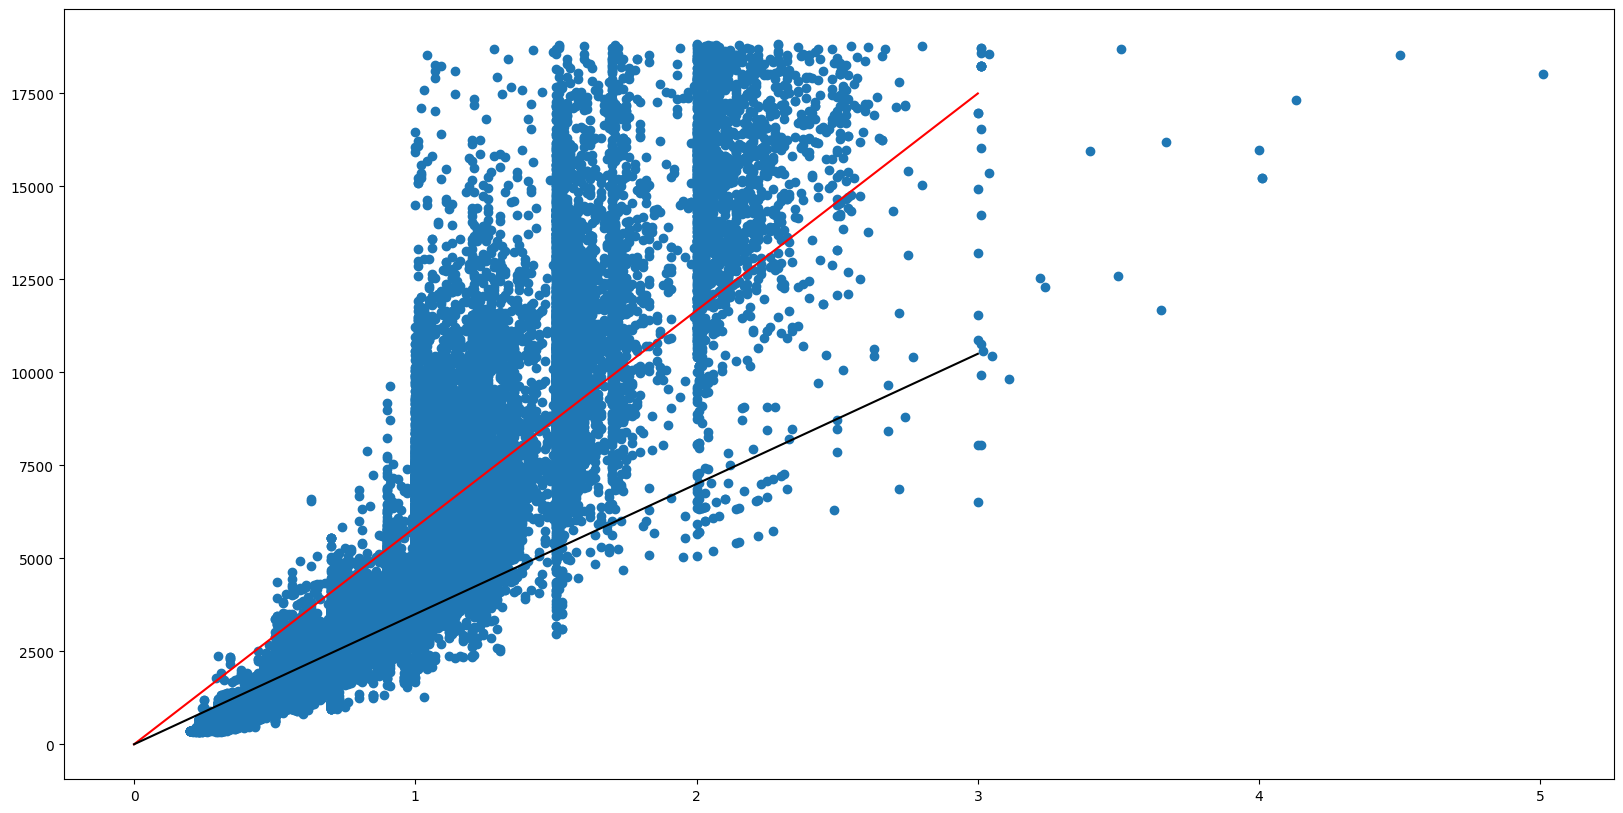

In [67]:
# On essaie de placer une courbe à la main
plt.figure(figsize=(20, 10))
plt.scatter(df.carat, df.price)
plt.plot([0, 3],[0, 17500],color="red")

plt.plot([0, 3],[0, 10_500],color="black")

# Dans ce cas : 
a_a_la_main = (17_500 - 0) / (3 - 0)
print(round(a_a_la_main, 2), "euros par carat")

- Petit point sur les types

In [68]:
type(df[['carat']]), type(df['carat']), type(df.carat)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

### Valeur du coeffient 'a'
On écrit qu'un prix est égal à un coefficient $a$ fois un nombre de carat, donc $a$ représente des euros pas carats

On trouve 5666 € / carat (par carat)

In [69]:
# df[['carat']]
# df.price

[5666.27006593]


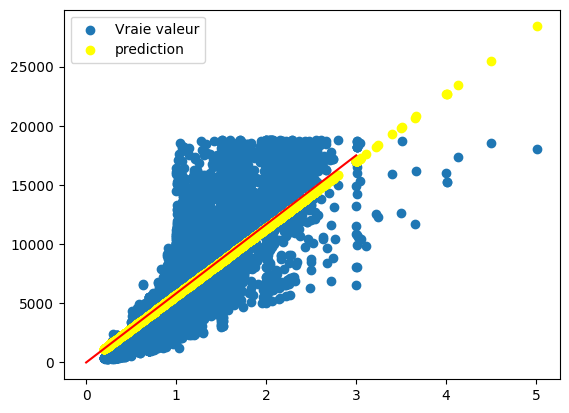

In [70]:
from sklearn.linear_model import LinearRegression
# On crée une instance de modèle


# first_intercept = True : y = ax+b
# first_intercept = False : y = ax

lr = LinearRegression(fit_intercept=False)
# le premier argument soit les X avec les quels on apprend (dans une DataFrame)
# le deuxieme argument de la "TARGET" (ie ce qu'on veut prédire) -> ici le prix
lr.fit(df[['carat']], df.price)

predictions = lr.predict(df[["carat"]])
print(lr.coef_)

# On essaie de placer une courbe à la main
plt.scatter(df.carat, df.price, label="Vraie valeur")
plt.scatter(df.carat, predictions, color="yellow", label="prediction")
plt.legend()

plt.plot([0, 3],[0, 17500],color="red")

# $P =  a_1 \times C + a_2 \times D$
- où $P$ est le prix et $C$ le nombre de carats
- où $D$ est la depth :  hauteur issue de la pointe vers la table 
(Régression linéaire linéaire multiple)


[7767.28549987  -36.71617751]


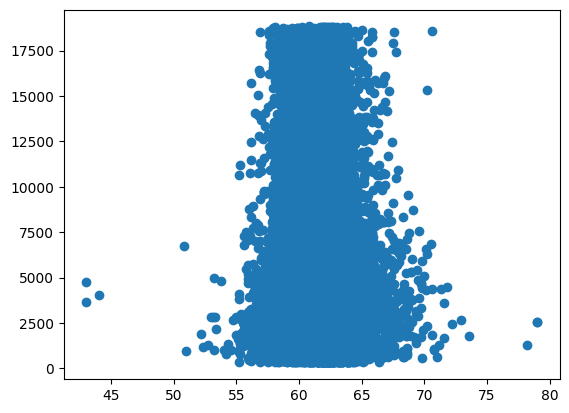

In [71]:
from sklearn.linear_model import LinearRegression
# On crée une instance de modèle
lr = LinearRegression(fit_intercept=False)
# le premier argument soit les X avec les quels on apprend (dans une DataFrame)
# le deuxieme argument de la "TARGET" (ie ce qu'on veut prédire) -> ici le prix
lr.fit(df[['carat', 'depth']],df.price)

predictions = lr.predict(df[["carat", "depth"]])
print(lr.coef_)

# Pas d'effet hyper marqué de la profondeur ... des prix élevés dans tous les cas
plt.scatter(df.depth, df.price)

In [72]:
df["depth_cut"] = pd.cut(df["depth"], 20)
df["table_cut"] = pd.cut(df["table"], 20)
# df.groupby(["depth_cut", "table_cut"]).price.mean().unstack()

### Avec plein de variables

#### $ P =  a_1 \times C + a_2 \times D  + a_3 \times T ...$


In [73]:
selected_columns_X = ["carat", "x", "y", "z", "depth", "table"]

# Target (variable endogène)
Y = df.price
# X (variables exogènes)
X = df[selected_columns_X]

# On définit un modèle de regression linéraire
lr = LinearRegression(fit_intercept=False)
# On l'entraîne
lr = lr.fit(X, Y)

# On prédit et on crée une nouvelle colonne
df["pred"] = lr.predict(X)

### Détail d'un calcul de prédiction (composante par composante)

In [74]:
for var, coef in zip(
    ["carat", "x", "y", "z", "depth", "table"],
    lr.coef_
):
    print(f'On calcule pour {var} : {round(coef, 2)} x Valeur de {var}')
    
print("On ajoute tous les valeurs trouvées : c'est le prix qu'on prédit")

########## Prédiction avec méthode predict
row = df.sample(1)
prediction = lr.predict(row[selected_columns_X])
print("avec methode sklearn", prediction)


########## Prédiction à la main
prediction_a_la_mano = 0
for var, coef in zip(
    ["carat", "x", "y", "z", "depth", "table"],
    lr.coef_
):
    prediction_a_la_mano += coef * row[var]
print(prediction_a_la_mano.iloc[0])

On calcule pour carat : 9533.95 x Valeur de carat
On calcule pour x : -522.63 x Valeur de x
On calcule pour y : 182.33 x Valeur de y
On calcule pour z : -676.75 x Valeur de z
On calcule pour depth : 28.29 x Valeur de depth
On calcule pour table : -18.82 x Valeur de table
On ajoute tous les valeurs trouvées : c'est le prix qu'on prédit
avec methode sklearn [3177.54693624]
3177.5469362364


In [75]:
### Valeurs pour le diamant sélectionné : 

# carat: 0.33
# x:4.49
# y: 4.47
# z: 2.69
# depth:60.0
# table: 58.0
    

### Valeurs pour le diamant sélectionné MULTIPLIÉ par la valeur du coeff associé

# carat: 0.33 * 9533 + 
# x:4.49 * -522 + 
# y: 4.47 * 182 +
# z: 2.69 * -676 + 
# depth:60.0 * 28 +
# table: 58.0 * -18 +

####################    => prix de 399


In [76]:
print(lr.predict(row[selected_columns_X]))
print(lr.coef_)
row[selected_columns_X]

[3177.54693624]
[9533.9516298  -522.62997672  182.32945466 -676.7502049    28.29107034
  -18.82200979]


,carat,x,y,z,depth,table
53534,0.72,5.67,5.64,3.64,64.4,59.0


### Inclure des variables catégorielles

#### $ P =  a \times C + a_1 \times Color_1 + a_2 \times Color_2 + a_3 \times Color_3 ...$

Avec $Color_i = 1 \text{ ou } 0$


**<div style="color:red">Pour des raisons mathématiques, il vaut mieux utiliser l'option drop_first=True</div>**


In [77]:
# Transformation de la colonne 'color' en dummies, en omettant la catégorie 'D' 
# drop_first : drop la première dans l'ordre alphabétique
color_dummies = pd.get_dummies(df['color'], prefix='color', drop_first=True)

# Ajout des dummies au DataFrame
df_with_dummies = pd.concat([df, color_dummies], axis=1)

##### Raisonnement
Dans ce cas, si un diamant appartient à la catégorie D, toutes les colonnes de dummies seront à 0. Si un diamant appartient à une autre catégorie, par exemple E, alors la colonne color_E sera à 1, et les autres à 0. Ainsi, l'effet de la catégorie E sur le prix, par rapport à la catégorie D, sera capturé par le coefficient de color_E.

##### Refit du modèle avec les nouvelles variables
Une fois que les variables indicatrices sont créées et ajoutées au DataFrame, le modèle de régression linéaire peut être recalculé pour inclure ces nouvelles variables.

In [78]:
# Sélection des variables pour le modèle, y compris les nouvelles dummies
selected_columns = ['carat'] + list(color_dummies.columns)

# Préparation des variables indépendantes X et de la variable dépendante y
X = df_with_dummies[selected_columns]
y = df_with_dummies['price']

# Création et entraînement du modèle de régression linéaire
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

# Prédiction et évaluation du modèle
predictions = lr.predict(X)
df['predicted_price'] = predictions

# Affichage des coefficients pour chaque variable, y compris les dummies
for var, coef in zip(selected_columns, lr.coef_):
    print(f'Coefficient pour {var} : {coef}')

Coefficient pour carat : 8066.623019109117
Coefficient pour color_E : -93.78128771977958
Coefficient pour color_F : -80.26285788582837
Coefficient pour color_G : -85.53628160008645
Coefficient pour color_H : -732.2418256357064
Coefficient pour color_I : -1055.731856705999
Coefficient pour color_J : -1914.4722027582336


## 10. Visualisation des résultats

- Avec l'intégration de ``matplotlib`` dans ``pandas``

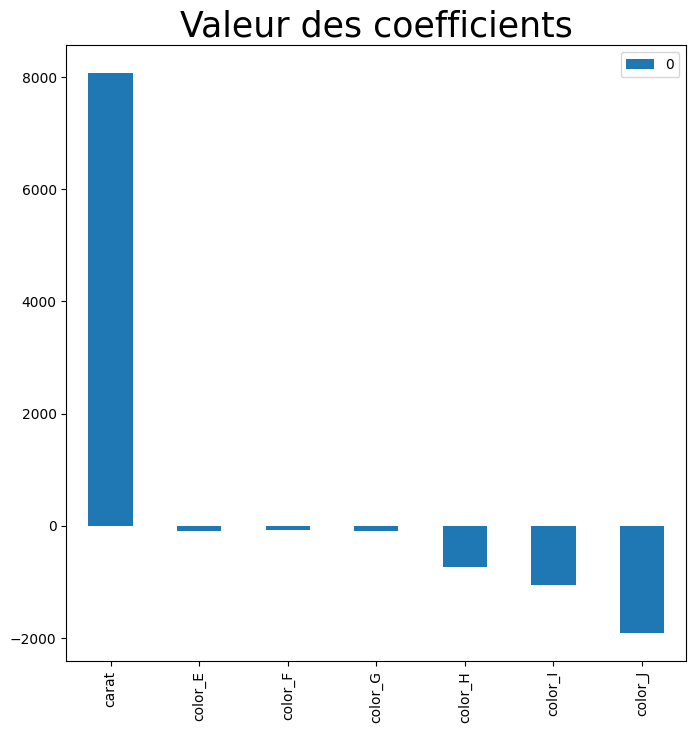

In [80]:
import matplotlib.pyplot as plt
df_coefs = pd.DataFrame(lr.coef_, index=selected_columns)
df_coefs.plot.bar(figsize=(8, 8))
plt.title("Valeur des coefficients", fontsize=25)
plt.show()

Text(0.5, 1.0, 'Prix et prix prédit moyens')

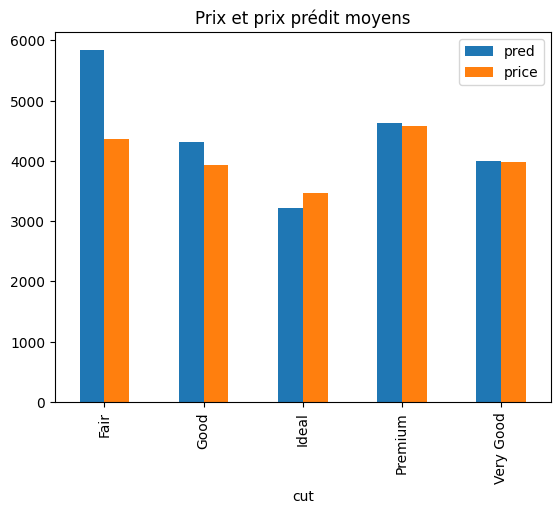

In [81]:
df.groupby("cut")[["pred", "price"]].mean().plot(kind='bar')
plt.title("Prix et prix prédit moyens")

Text(0.5, 1.0, 'Ecarts types des prix et prix prédits')

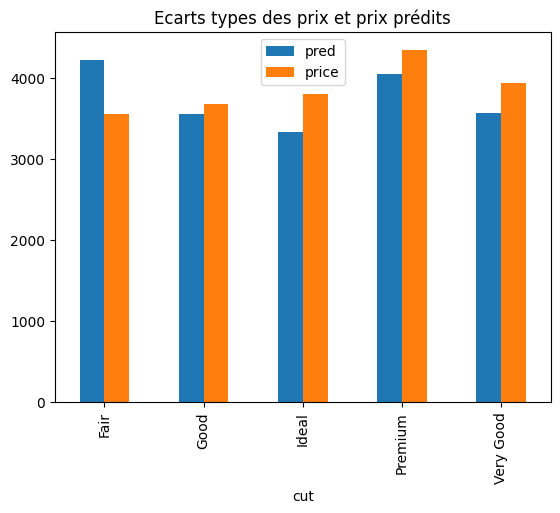

In [82]:
df.groupby("cut")[["pred", "price"]].std().plot(kind='bar')
plt.title("Ecarts types des prix et prix prédits")

In [83]:
row =  df[df.pred < 0].iloc[0]
parts = []
for col, coef_value in zip(row[selected_columns_X].index, lr.coef_):
    print(col, row[col] * coef_value)
    parts.append(row[col] * coef_value)
sum(parts)

carat 1855.323294395097
x -370.4360864931294
y -319.4461743855969
z -207.8531642882101
depth -45032.87227659595
table -58065.25211882994


-102140.53652619773

In [84]:
row

Unnamed: 0                    1
carat                      0.23
cut                       Ideal
color                         E
clarity                     SI2
depth                      61.5
table                      55.0
price                       326
x                          3.95
y                          3.98
z                          2.43
depth_cut          (61.0, 62.8]
table_cut          (53.4, 56.0]
pred                 -85.721014
predicted_price     -374.686847
Name: 0, dtype: object

Text(0.5, 0.98, 'Densité du prix et du prix prédit')

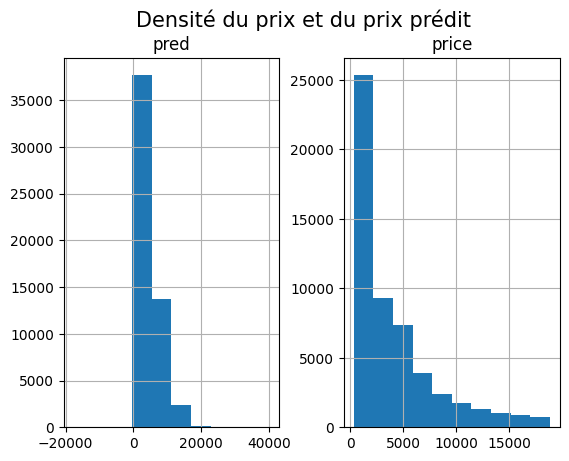

In [85]:
import matplotlib.pyplot as plt
df[["pred", "price"]].hist()
plt.suptitle("Densité du prix et du prix prédit", fontsize=15)

- Avec du pur ``matplotlib``

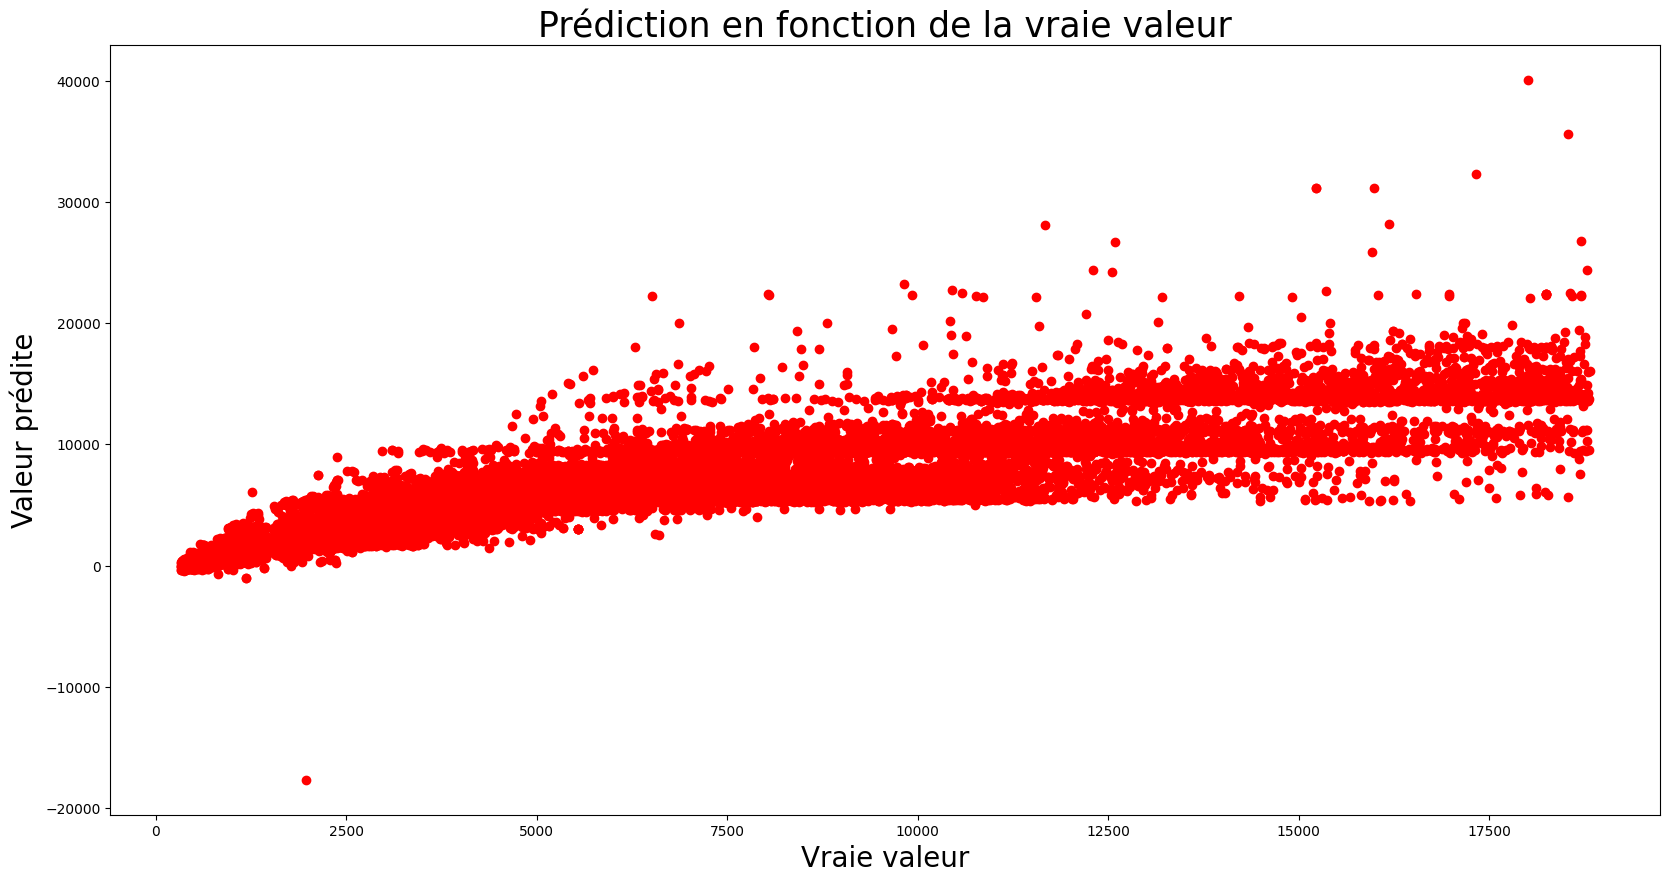

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.scatter(df.price, df.pred, color="red")
plt.xlabel("Vraie valeur", fontsize=20)
plt.ylabel("Valeur prédite", fontsize=20)
plt.title("Prédiction en fonction de la vraie valeur", fontsize=25)
plt.show()

***
***
### DRAFT
***
***

In [ ]:
import numpy as np

# Un Array d'Array
# Chaque composante suit une loi normale :
# symétrique / 99 % de chance d'être entre -4 et 4
np.random.randn(4, 2)  # 4 lignes, 2 colonnes

import matplotlib.pyplot as plt 
plt.hist(np.random.randn(100_000), bins=100)
plt.show()


# Pour positivité -> valeur absolute 
# x 5 pour échelles de valeurs
# on arrondit 
# + 1 pour décaler et ne pas avoir de prix à 0
import matplotlib.pyplot as plt 
prices = 5 * pd.Series(np.random.randn(100_000)).abs()
prices = prices.map(int)
plt.hist(prices, bins=100)
plt.title("5 fois la valeur absolue")
plt.show()


# Autre solution
import matplotlib.pyplot as plt 
prices = 5 * pd.Series(np.random.randn(100_000)).abs()
prices = prices - prices.min() # min est négatif
prices = prices.map(int) + 1
plt.hist(prices, bins=100)
plt.title("+ Min x 5 int + 1")
plt.show()


#### Aussi
## np.random.exponential(2)


### Renvoie une valeur au hasard dans une liste 
print(np.random.choice([1, 2, 3, 4]))
np.random.choice([1, 2, 3, 4], p=[0.94, 0.02, 0.02, 0.02])

sample = [
    np.random.choice([1, 2, 3, 4], p=[0.94, 0.02, 0.02, 0.02])
    for _ in range(10_000)
]

mean_sample = np.mean(sample)
# Moyenne = Somme des (Proba * Valeur)
mean_theoric = 1*0.94 + 2*0.02 + 3*0.02 + 4*0.02

print(f"mean_sample={mean_sample}")
print(f"mean_theoric={mean_theoric}")